---
* ### Import as libs  

In [95]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

---
* ### Constantes

In [96]:
# massas
m0 = 1
m1 = 0.5

# constantes de amortecimento
c0 = 1
c1 = 0.1

# constantes de rigidez
k0 = 10
k1 = 1

# modal participation factor
beta_0 = 0.03

---
* ### Matrizes

In [97]:
# Matriz de massa
M = sp.Matrix([[m0, 0],
               [0, m1]])

# Matriz de amortecimento
C = sp.Matrix([[c0 + c1, -c1],
                [-c1, c1]])

# Matriz de rigidez
K = sp.Matrix([[k0 + k1, -k1],
                [-k1, k1]])

# Matriz da entrada u
B = sp.Matrix([[-1],[1]])

# Matriz da entrada do deslocamento do solo
D = sp.Matrix([[beta_0*m0],[m1]])

---
* ### Funções de transferência

In [98]:
t, s = sp.symbols('t s', positive=True, real=True)

A = M*s**2 + C*s + K 

# Função de transferência do sistema
H_U = A.inv() * B
H_Q = A.inv() * C

# Simplificação das expressões
H_U = sp.simplify(H_U)
H_Q = sp.simplify(H_Q)

# matriz de transferência do sistema 
H = sp.Matrix.hstack(H_U, H_Q)

print("X0/U =", H_U[0,0])
print("X0/Q =", H_Q[0,0])
print("X1/U =", H_U[1,0])
print("X1/Q =", H_Q[1,0])

X0/U = -0.5*s**2/(0.5*s**4 + 0.65*s**3 + 6.6*s**2 + 2.0*s + 10.0)
X0/Q = (0.55*s**2 + 0.1*s + 1.0)/(0.5*s**4 + 0.65*s**3 + 6.6*s**2 + 2.0*s + 10.0)
X1/U = (1.0*s**2 + 1.0*s + 10.0)/(0.5*s**4 + 0.65*s**3 + 6.6*s**2 + 2.0*s + 10.0)
X1/Q = -0.1*s**2/(0.5*s**4 + 0.65*s**3 + 6.6*s**2 + 2.0*s + 10.0)


---
* ### Excitação

In [99]:
import sympy as sp
t = sp.symbols('t', real=True, positive=True)

# Parâmetros
Amp, alpha, omega, phi = sp.symbols('A alpha omega phi', positive=True, real=True)

pars = {
    Amp:   1,                  # amplitude
    alpha: sp.Rational(2, 5),  # 0.4 (use Rational p/ evitar erros numéricos)
    omega: 8,                  # rad/s
    phi:   0                   # fase
}

# Seno amortecido A*sin(omega*t+phi)*e^−alpha*t
Q = Amp * ((s+alpha)*sp.sin(phi) + omega*sp.cos(phi)) / ((s+alpha)**2 + omega**2)
Q_num = sp.nsimplify(Q.subs(pars), rational=True)

print("Excitação Q(s):")
print(Q)
print(Q_num)

Excitação Q(s):
A*(omega*cos(phi) + (alpha + s)*sin(phi))/(omega**2 + (alpha + s)**2)
8/((s + 2/5)**2 + 64)


---
* ### Transformada inversa

In [100]:
# Convolucao com excitacao
H_0 = sp.sympify(H[0,0] * Q_num)
H_1 = sp.sympify(H[0,1] * Q_num)

# Transformada inversa
x0 = sp.simplify(sp.inverse_laplace_transform(H_0, s, t))
x1 = sp.simplify(sp.inverse_laplace_transform(H_1, s, t))

---
* ### Plot

c:\Users\alison.tristao\AppData\Local\anaconda3\envs\aqtech\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\alison.tristao\AppData\Local\anaconda3\envs\aqtech\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


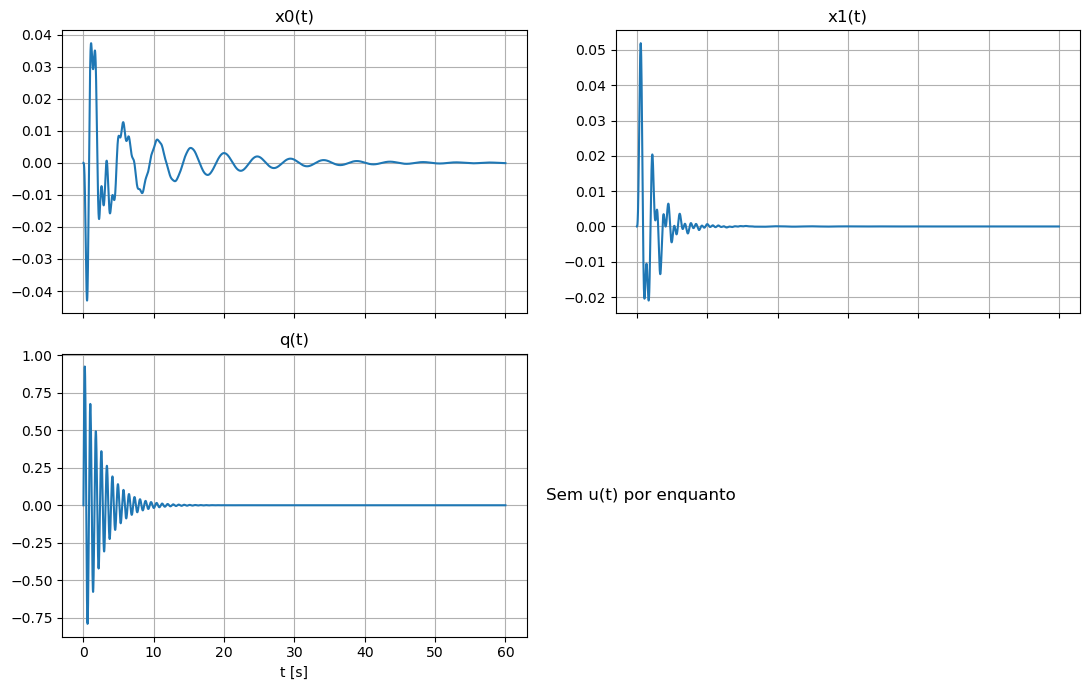

In [101]:
# Funções numéricas para plotar no numpy
x0_fun = sp.lambdify(t, x0, 'numpy')
x1_fun = sp.lambdify(t, x1, 'numpy')
q_fun  = sp.lambdify(t, Q_num, 'numpy')

# tempo 
t_end = 60.0
tt = np.linspace(0, t_end, 20000)

fig, axs = plt.subplots(2, 2, figsize=(11, 7), sharex=True)

# x0 e x1
axs[0, 0].plot(tt, x0_fun(tt))
axs[0, 0].set_title('x0(t)')
axs[0, 0].grid(True)

axs[0, 1].plot(tt, x1_fun(tt))
axs[0, 1].set_title('x1(t)')
axs[0, 1].grid(True)

# q e u 
# gambiarra pro q dar pra plotar
q_expr = Amp*sp.exp(-alpha*t)*sp.sin(omega*t + phi)
q_num  = sp.nsimplify(q_expr.subs(pars), rational=True)
q_fun  = sp.lambdify(t, q_num, 'numpy')
q_vals = q_fun(tt)

axs[1, 0].plot(tt, q_vals)
axs[1, 0].set_title('q(t)')
axs[1, 0].set_xlabel('t [s]')
axs[1, 0].grid(True)

axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, 'Sem u(t) por enquanto', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()